In [62]:
#Import the neccessary libraries
import numpy as np
import os
import matplotlib.pyplot as plt

In [63]:
from imutils import paths

In [64]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [65]:
#Loading the image dataset path which contains 2 categories: with mask and without mask
dataset = r'C:\Users\Dinesh\Desktop\Object Detection using Tensorflow\Face Mak Detection\Dataset'
imagePath = list(paths.list_images(dataset))

In [66]:
imagePath[0]

'C:\\Users\\Dinesh\\Desktop\\Object Detection using Tensorflow\\Face Mak Detection\\Dataset\\without_mask\\0.jpg'

In [67]:
#Loading the list of image and labels
data = []
labels = []

for i in imagePath:
        
    image = load_img(i, target_size=(224,224))
    image = img_to_array(image)
    image = preprocess_input(image)
    data.append(image)
    
    label = i.split(os.path.sep)[-2]
    labels.append(label)

C:\Users\Dinesh\Anaconda3\envs\yolov3-gpu\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [68]:
data

[array([[[-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         ...,
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.84313726, -0.8980392 , -0.77254903]],
 
        [[-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         ...,
         [-0.7490196 , -0.8039216 , -0.6784314 ],
         [-0.7490196 , -0.8039216 , -0.6784314 ],
         [-0.7411765 , -0.79607844, -0.67058825]],
 
        [[-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9529412 , -0.81960785],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         ...,
         [-0.88235295, -0.8980392 , -0.7882353 ],
         [-0.85882354, -0.8901961 , -0.77254903],
         [-0.85882354, -0.8745098 , -0.7647059 ]],
 
        ...,
 
        [[ 0.38823533, -0.9607843 

In [69]:
labels

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [70]:
#Converting the list of image and label into array
data = np.array(data, dtype='float32')
labels = np.array(labels)

In [71]:
data

array([[[[-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         ...,
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.84313726, -0.8980392 , -0.77254903]],

        [[-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         ...,
         [-0.7490196 , -0.8039216 , -0.6784314 ],
         [-0.7490196 , -0.8039216 , -0.6784314 ],
         [-0.7411765 , -0.79607844, -0.67058825]],

        [[-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9529412 , -0.81960785],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         ...,
         [-0.88235295, -0.8980392 , -0.7882353 ],
         [-0.85882354, -0.8901961 , -0.77254903],
         [-0.85882354, -0.8745098 , -0.7647059 ]],

        ...,

        [[ 0.38823533, -0.9607843 , -0

In [72]:
data.shape

(3833, 224, 224, 3)

In [73]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [74]:
#Perform One-hot encoding on labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [75]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [76]:
#Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels)

In [77]:
X_train.shape

(3066, 224, 224, 3)

In [78]:
X_test.shape

(767, 224, 224, 3)

In [79]:
y_train.shape

(3066, 2)

In [80]:
y_test.shape

(767, 2)

In [81]:
#Image augmentation
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, 
                         shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest')

In [82]:
#Load the MobileNet_V2 network, and exclude the last layer
baseModel = MobileNetV2(weights= 'imagenet', include_top= False, input_tensor= Input(shape=(224, 224, 3)))

C:\Users\Dinesh\Anaconda3\envs\yolov3-gpu\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [83]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [84]:
#Construct the head of model that will be placed on top of the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7,7))(headModel)
headModel = Flatten(name= 'flatten')(headModel)
headModel = Dense(128, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation='softmax')(headModel)

model = Model(inputs= baseModel.input, outputs = headModel)

In [85]:
#loop over all layers in base model and stop the re-training
for layer in baseModel.layers:
    layer.trainable = False

In [86]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [87]:
#Initialize the learning rate, Epochs, Batch_size and compile the Model
learning_rate = 0.001
epochs = 20
batch_size = 32
opt = Adam(lr= learning_rate, decay= learning_rate/epochs)

model.compile(loss= 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [88]:
#Train the head of the network
d= model.fit(aug.flow(X_train, y_train, batch_size=batch_size),
             steps_per_epoch=len(X_train)//batch_size,
             validation_data=(X_test, y_test),
             validation_steps=len(X_test)//batch_size,
             epochs = epochs
            )

model.save(r'C:\Users\Dinesh\Desktop\Object Detection using Tensorflow\Face Mak Detection\MobileNet_V2.model', save_format='h5')

  ...
    to  
  ['...']
Train for 95 steps, validate on 767 samples
Epoch 1/20
95/95 [==============================] - 158s 2s/step - loss: 0.3561 - accuracy: 0.8481 - val_loss: 0.2316 - val_accuracy: 0.9022
Epoch 2/20
95/95 [==============================] - 65s 686ms/step - loss: 0.1867 - accuracy: 0.9272 - val_loss: 0.2104 - val_accuracy: 0.9212
Epoch 3/20
95/95 [==============================] - 65s 686ms/step - loss: 0.1789 - accuracy: 0.9331 - val_loss: 0.2486 - val_accuracy: 0.9130
Epoch 4/20
95/95 [==============================] - 65s 685ms/step - loss: 0.1454 - accuracy: 0.9420 - val_loss: 0.4411 - val_accuracy: 0.8696
Epoch 5/20
95/95 [==============================] - 65s 686ms/step - loss: 0.1252 - accuracy: 0.9525 - val_loss: 0.2790 - val_accuracy: 0.9076
Epoch 6/20
95/95 [==============================] - 65s 685ms/step - loss: 0.1177 - accuracy: 0.9539 - val_loss: 0.3697 - val_accuracy: 0.8804
Epoch 7/20
95/95 [==============================] - 65s 685ms/step - loss: 

In [89]:
#Make prediction on testing set
pred = model.predict(X_test, batch_size=batch_size)
pred = np.argmax(pred, axis=1)
print(classification_report(y_test.argmax(axis=1), pred, target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.98      0.89      0.93       383
without_mask       0.90      0.98      0.94       384

    accuracy                           0.94       767
   macro avg       0.94      0.94      0.94       767
weighted avg       0.94      0.94      0.94       767



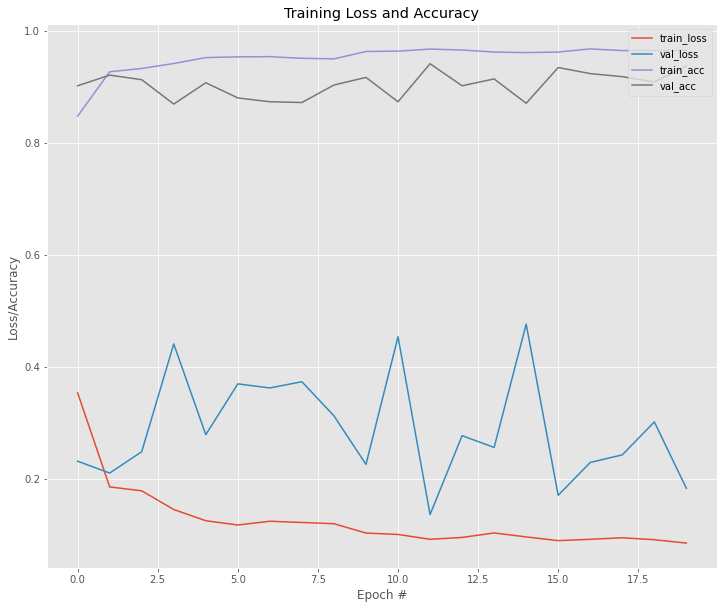

<Figure size 432x288 with 0 Axes>

In [90]:
# plot the training loss and accuracy
plt.figure(figsize=(12,10))

n = epochs
plt.style.use("ggplot")


plt.plot(np.arange(0, n), d.history["loss"], label="train_loss")
plt.plot(np.arange(0, n), d.history["val_loss"], label="val_loss")

plt.plot(np.arange(0, n), d.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n), d.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.figure()
plt.savefig(r'C:\Users\Dinesh\Desktop\Object Detection using Tensorflow\Face Mak Detection\plot_v2.png')
